# Apple Scab Detection Using Deep Learning Based CNN (Data Preparation)

## DSE309 Advanced Programming in Python - Project, Submitted by Ayush Dabra (19069), Department of Data Science and Engineering

## AppleScabFDs Dataset

### Context

Dataset contains images with apples infected by scab. The images are grouped in two folders: "Healthy" and "Scab". The collection of digital images were carried out in different locations of Latvia. Digital images with characteristic scab symptoms on fruits were collected by the Institute of Horticulture (LatHort) under project "lzp-2019/1-0094 Application of deep learning and datamining for the study of plant-pathogen interaction: the case of apple and pear scab" with a goal to create mobile application for apple scab detection using convolution neural networks.

### Technical Information

Devices: smartphone cameras (12 MP, 13 MP, 48 MP) and a digital compact camera (10 MP). The collection of images was carried out in field conditions, in orchards. The images were taken at three different stages of the day - in the morning (9:00 - 10:00), around noon (12:00 - 14:00), as well as in the evening (16:00 - 17:00) to provide a variety of natural light conditions. The images were also taken on both sunny days and overcast days to provide different types of light (soft light and hard light). The leaves were framed so that they occupied the image area as much as possible and were in the center of the image, and the focal point was on the object. The object may have had other leaves or fruits in the background. The same object was photographed from multiple viewpoints.

### Citation

S. Kodors, G. Lacis, O. Sokolova, V. Zhukovs, I. Apeinans and T. Bartulsons. 2021. Apple Scab Detection using CNN and Transfer Learning. *Agronomy Research*, 19(2), 507–519. doi: [10.15159/AR.21.045](https://doi.org/10.15159/ar.21.045)

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import albumentations as A
import os, shutil, cv2
from tqdm import tqdm

# Importing Dataset

In [2]:
data_dir = '../input/applescabfds/AppleScabFDs/'
train_data_dir = '../input/applescabfds-dataset/AppleScabFDs_Splitted/train/'
test_data_dir = '../input/applescabfds-dataset/AppleScabFDs_Splitted/test/'

# Original AppleScabFDs Dataset

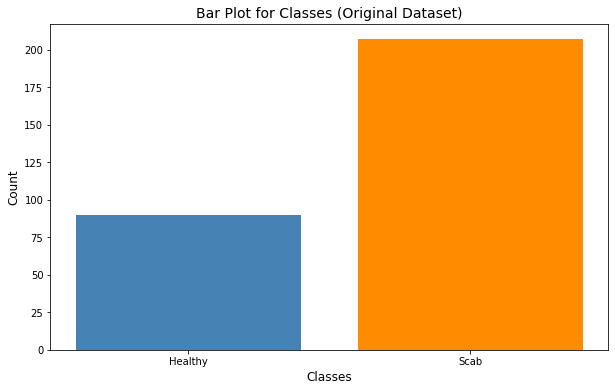

In [3]:
num_healthy_images = len(os.listdir(data_dir+'Healthy'))
num_scab_images = len(os.listdir(data_dir+'Scab'))
plt.figure(figsize=(10, 6))
data = {'Healthy': num_healthy_images, 'Scab':num_scab_images}
plt.bar(data.keys(), data.values(), color = ['steelblue', 'darkorange'])
plt.title('Bar Plot for Classes (Original Dataset)', fontsize=14)
plt.xlabel("Classes", fontsize=12) 
plt.ylabel("Count", fontsize=12) 

plt.savefig('data', facecolor= 'w', transparent= False, bbox_inches= 'tight', dpi= 300)

We can clearly see that there is class imabalance present in the dataset. We can perform data augmentation on the `Healthy` class.

In [4]:
print('ORIGINAL DATASET:\n')
print('Healthy:', num_healthy_images)
print('Scab:', num_scab_images)

ORIGINAL DATASET:

Healthy: 90
Scab: 207


# Splitted AppleScabFDs Dataset

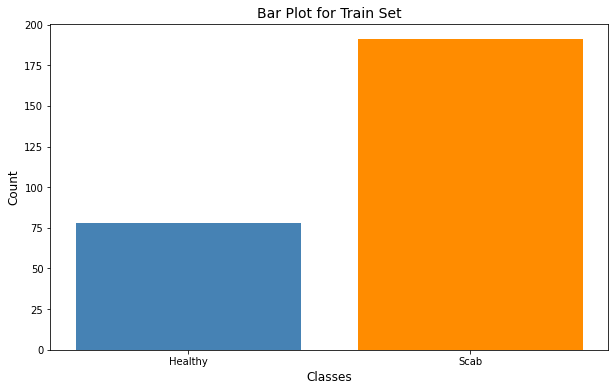

In [5]:
# Training set

plt.figure(figsize=(10, 6))
data = {'Healthy': len(os.listdir(train_data_dir+'Healthy')), 'Scab': len(os.listdir(train_data_dir+'Scab'))}
plt.bar(data.keys(), data.values(), color = ['steelblue', 'darkorange'])
plt.title('Bar Plot for Train Set', fontsize=14)
plt.xlabel("Classes", fontsize=12) 
plt.ylabel("Count", fontsize=12) 

plt.savefig('train_set_plot', facecolor= 'w', transparent= False, bbox_inches= 'tight', dpi= 300)

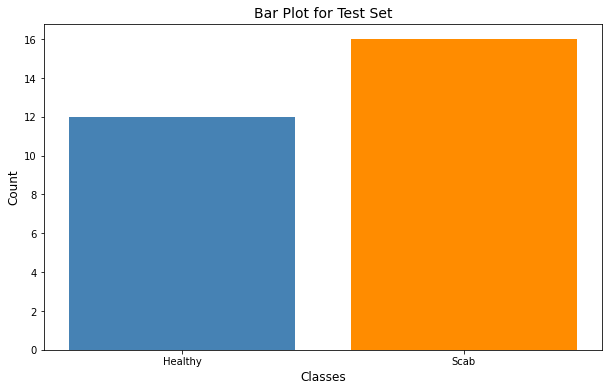

In [6]:
# Test set

plt.figure(figsize=(10, 6))
data = {'Healthy': len(os.listdir(test_data_dir+'Healthy')), 'Scab': len(os.listdir(test_data_dir+'Scab'))}
plt.bar(data.keys(), data.values(), color = ['steelblue', 'darkorange'])
plt.title('Bar Plot for Test Set', fontsize=14)
plt.xlabel("Classes", fontsize=12) 
plt.ylabel("Count", fontsize=12) 

plt.savefig('test_set_plot', facecolor= 'w', transparent= False, bbox_inches= 'tight', dpi= 300)

In [7]:
print('TRAINING SET:')
print('Healthy:', len(os.listdir(train_data_dir+'Healthy')))
print('Scab:', len(os.listdir(train_data_dir+'Scab')))

print('\nTESTING SET:')
print('Healthy:', len(os.listdir(test_data_dir+'Healthy')))
print('Scab:', len(os.listdir(test_data_dir+'Scab')))

TRAINING SET:
Healthy: 78
Scab: 191

TESTING SET:
Healthy: 12
Scab: 16


# Data Visualization

In [8]:
def show_data(path, label):
        fig, axs = plt.subplots(3, 4, figsize=(16, 12), constrained_layout=True)
        if label == 'healthy':
            files = os.listdir(f'{path}Healthy/')
            fig.suptitle('Healthy Apples\n', fontsize=18, fontweight='medium')
            idx = 0
            for i in range(3):
                for j in range(4):
                    axs[i][j].imshow(cv2.resize(cv2.cvtColor(cv2.imread(f'{path}Healthy/{files[idx]}'), cv2.COLOR_BGR2RGB),(500, 500)))
                    axs[i][j].set_title(f'{files[idx]}', fontdict = {'fontsize':14, 'fontweight':'medium'})
                    axs[i][j].set_xticks(np.arange(0, 501, 100))
                    axs[i][j].set_yticks(np.arange(0, 501, 100))
                    axs[i][j].grid(False)
                    axs[i][j].axis(True)
                    idx += 1
        elif label == 'scab':
            files = os.listdir(f'{path}Scab/')
            fig.suptitle('Scab Apples\n', fontsize=18, fontweight='medium')
            idx = 0
            for i in range(3):
                for j in range(4):
                    axs[i][j].imshow(cv2.resize(cv2.cvtColor(cv2.imread(f'{path}Scab/{files[idx]}'), cv2.COLOR_BGR2RGB),(500, 500)))
                    axs[i][j].set_title(f'{files[idx]}', fontdict = {'fontsize':14, 'fontweight':'medium'})
                    axs[i][j].set_xticks(np.arange(0, 501, 100))
                    axs[i][j].set_yticks(np.arange(0, 501, 100))
                    axs[i][j].grid(False)
                    axs[i][j].axis(True)
                    idx += 1
                        
        plt.savefig(f'{label}_apples', facecolor= 'w', transparent= False, bbox_inches= 'tight', dpi= 300)
        plt.show()

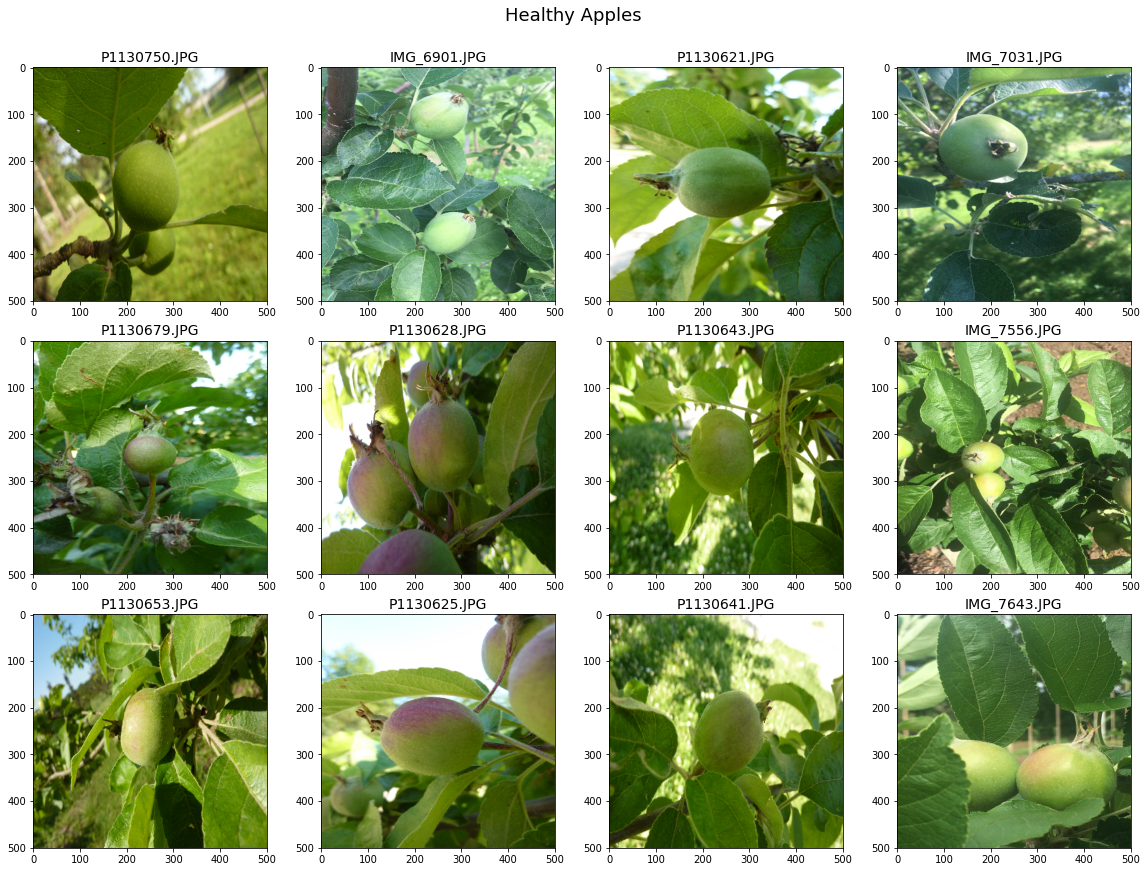

In [9]:
show_data(path=train_data_dir, label = 'healthy')

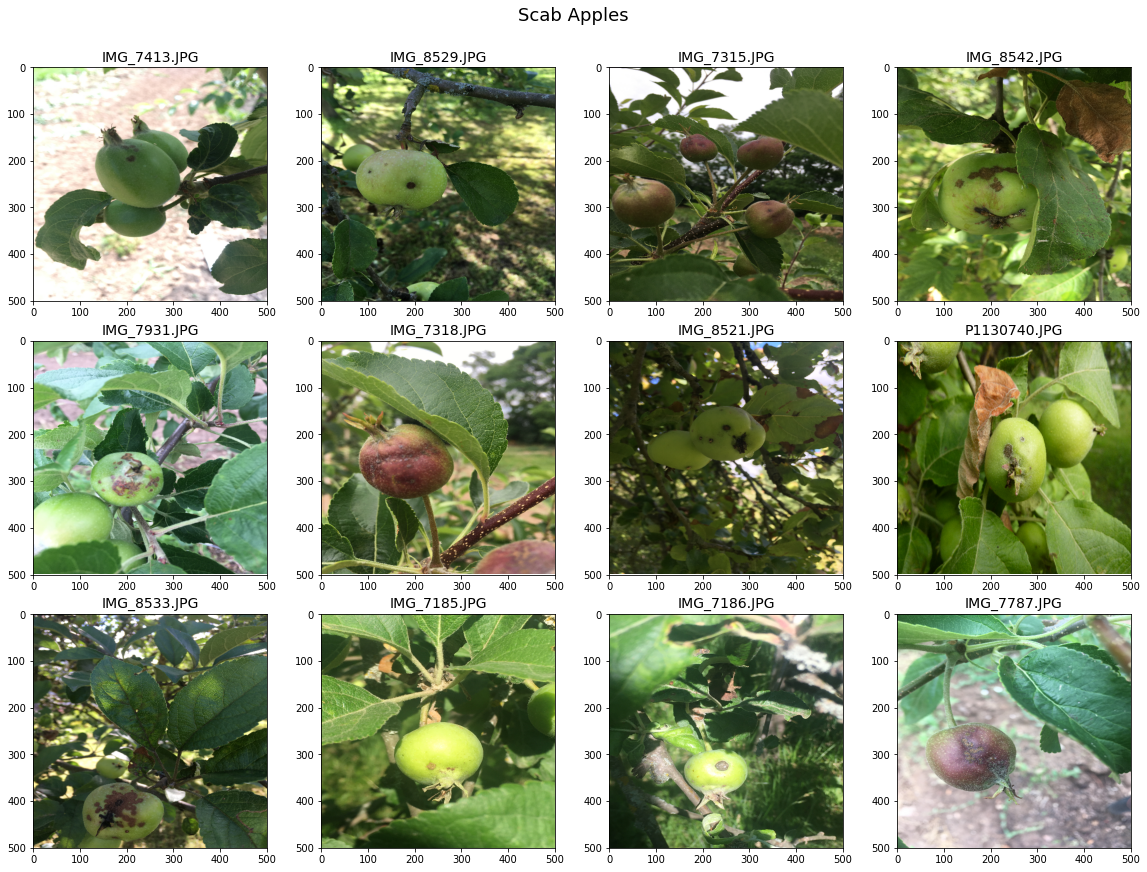

In [10]:
show_data(path=train_data_dir, label = 'scab')

# Data Augmentation using Albumentations Library

[Albumentations](https://albumentations.ai/) is a Python library for fast and flexible image augmentations. Albumentations efficiently implements a rich variety of image transform operations that are optimized for performance, and does so while providing a concise, yet powerful image augmentation interface for different computer vision tasks, including object classification, segmentation, and detection.

- There are only 297 images in the dataset (90 images in `Healthy` class and 207 images in `Scab` class). Out of which I have used 269 images (\~90%) for training set and remaining 28 images (\~10%) for test set. 

- Class-imbalance is present in the dataset, the `Healthy` class is under represented. There are only 78 images in the `Healthy` class, while the `Scab` class has 191 images. To minimize the extent of class-imbalance, artificial data augmentation has been applied on the images belonging to the `Healthy` class in the training set.

- By data augmentation, the no. of images present in the `Healthy` class are increased from 78 to 156 (i.e. two times).

Data augmentation is done by the following techniques:

1. Random Cropping
2. Horizontal Flipping
3. Vertical Flipping
4. Rotation
5. Random Brightness & Contrast
6. Contrast Limited Adaptive Histogram Equalization (CLAHE)
7. Color Jitter

In [11]:
transform = A.Compose([
    A.RandomCrop(width=2400, height=2400, p=1.0),
    A.HorizontalFlip(p=1.0),
    A.VerticalFlip(p=1.0),
    A.Rotate(limit=[60, 240], p=1.0, interpolation=cv2.INTER_NEAREST),
    A.RandomBrightnessContrast(brightness_limit=[-0.2, 0.3], contrast_limit=0.2, p=0.75),
    A.OneOf([
        A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=0.75),
        A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, always_apply=False, p=0.25)
    ], p=1.0),
], p=1.0)

## Saving Augmented Images to Disk

In [12]:
!mkdir aug_healthy_images

In [13]:
healthy_images_files = os.listdir(f'{train_data_dir}Healthy')

In [14]:
def augment_dataset(files, path):
    i = 0
    for file in tqdm(files, desc="[Augmentation…]", ascii=False, ncols=75):
        img = cv2.imread(path+file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        transformed = transform(image=img)
        transformed_image = transformed['image']
        file_name = file.split('.')[0]
        cv2.imwrite(f'aug_healthy_images/AUG_{file_name}.JPG',cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
        i += 1
    print('Data augmentation completed!')

In [15]:
augment_dataset(files=healthy_images_files, path= f'{train_data_dir}Healthy/')

[Augmentation…]: 100%|█████████████████████| 78/78 [00:34<00:00,  2.28it/s]

Data augmentation completed!


In [16]:
!zip -r kaggle_kernel_data_prep.zip './'

  adding: __notebook_source__.ipynb (deflated 44%)
  adding: scab_apples.png (deflated 0%)
  adding: test_set_plot.png (deflated 38%)
  adding: healthy_apples.png (deflated 0%)
  adding: train_set_plot.png (deflated 36%)
  adding: aug_healthy_images/ (stored 0%)
  adding: aug_healthy_images/AUG_IMG_7559.JPG (deflated 0%)
  adding: aug_healthy_images/AUG_P1130627.JPG (deflated 0%)
  adding: aug_healthy_images/AUG_P1130685.JPG (deflated 0%)
  adding: aug_healthy_images/AUG_20200714_162002.JPG (deflated 0%)
  adding: aug_healthy_images/AUG_P1130631.JPG (deflated 0%)
  adding: aug_healthy_images/AUG_P1130682.JPG (deflated 0%)
  adding: aug_healthy_images/AUG_IMG_6743.JPG (deflated 0%)
  adding: aug_healthy_images/AUG_P1130630.JPG (deflated 1%)
  adding: aug_healthy_images/AUG_IMG_6901.JPG (deflated 0%)
  adding: aug_healthy_images/AUG_IMG_7571.JPG (deflated 0%)
  adding: aug_healthy_images/AUG_P1130628.JPG (deflated 0%)
  adding: aug_healthy_images/AUG_P1130677.JPG (deflated 0%)
  adding: 